# Hypothesis Testing
### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?
### Null Hypothesis
- The network latency has gone down or remained constant since switching providers

### Alt Hypothesis
- The network latency has gone up since switching

### True positive
- We reject the null hypothesis, the network latency indeed went up

### True negative
- We accept the null hypothesis, the network latency did not go up

### Type I
- The network latency appeared to go up, but did not.

### Type II
- The network latency did not appear to go up, but it did.


## Is the website redesign any good?
### Null Hypothesis
- The website redesign negatively or did not affect customer retention

### Alt Hypothesis
- The website redesign positively impacted customer retention

### True positive
- We reject the null hypothesis, The website redesign indeed improved customer retention

### True negative
- We accept the null hypothesis, The website redesign did not improve customer retention

### Type I
- The website redesign appeared to improve customer retention, but did not.

### Type II
- The website redesign did not appear to improve customer retention, but it did.

## Is our television ad driving more sales?
### Null Hypothesis
- Our ad is not driving or not affecting sales

### Alt Hypothesis
- Our ad is driving more sales

### True positive
- We reject the null hypothesis, our ad indeed drove more sales

### True negative
- We accept the null hypothesis, our ad did not drive more sales

### Type I
- Our ad appeared to drive more sales, but did not.

### Type II
- Our ad did not appear to drive more sales, but did.

# T-Test Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [1]:
from pydataset import data
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ace Realty

In [2]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
# Use a .05 level of significance.
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)

(array([2., 8., 6., 4., 5., 3., 7., 2., 1., 2.]),
 array([ 57.61876518,  64.4957146 ,  71.37266402,  78.24961344,
         85.12656286,  92.00351228,  98.8804617 , 105.75741112,
        112.63436054, 119.51130996, 126.38825938]),
 <BarContainer object of 10 artists>)

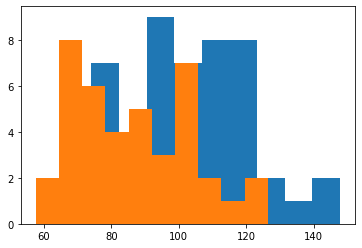

In [3]:
# Plot the distributions.
plt.hist(office2)
plt.hist(office1)

In [4]:
# Null: H_0 = No difference, H_a = Difference
# alpha: .05
# Verify: Independent variables, normal distribution, equal variance...
office1.var(), office2.var()

(290.3065662040558, 326.66199042135156)

In [5]:
# Variance is not equal
# Calculate t and p
t, p = stats.ttest_ind(office1, office2, equal_var=False)
t, p 

(-4.138716559699031, 8.148389621184644e-05)

In [6]:
# Decide
p/2 < .05

True

#### We reject the null hypothesis, the difference between Office 1 and Office 2 is statistically significant.

In [7]:
# Safe test
stats.mannwhitneyu(office1, office2)

MannwhitneyuResult(statistic=539.0, pvalue=9.228485738170144e-05)

## mpg dataset

In [8]:
# Load the mpg dataset
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

(array([ 5., 12., 24., 17., 16., 20., 16.,  3.,  3.,  1.]),
 array([ 9. , 10.9, 12.8, 14.7, 16.6, 18.5, 20.4, 22.3, 24.2, 26.1, 28. ]),
 <BarContainer object of 10 artists>)

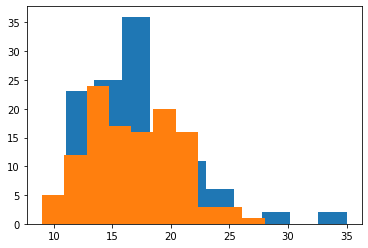

In [9]:
# Plot the distributions
plt.hist(df[df.year == 1999].cty)
plt.hist(df[df.year == 2008].cty)

In [10]:
# Establish hypothesis: H_0 = No, H_a = Yes
# Set alpha: alpha = .05
# Verify assumptions: Normal-ish distribution, Independent variables, equal variance...
df[df.year == 1999].cty.var(), df[df.year == 2008].cty.var()

(19.879015620394938, 16.452844090775127)

In [11]:
# Compute t and p
t, p = stats.ttest_ind(df[df.year == 1999].cty, df[df.year == 2008].cty)
t, p

(0.5674988409997608, 0.5709240495406107)

In [12]:
p/2 < .05

False

#### We accept the null hypothesis, there is no statistical significance between the fuel efficency of cars made in 1999 versus 2008.

In [13]:
# Safe test
stats.mannwhitneyu(df[df.year == 1999].cty, df[df.year == 2008].cty)

MannwhitneyuResult(statistic=6790.5, pvalue=0.45870813783633435)

### Are compact cars more fuel-efficient than the average car?

(array([ 5., 11., 10., 15.,  0.,  2.,  2.,  1.,  0.,  1.]),
 array([15. , 16.8, 18.6, 20.4, 22.2, 24. , 25.8, 27.6, 29.4, 31.2, 33. ]),
 <BarContainer object of 10 artists>)

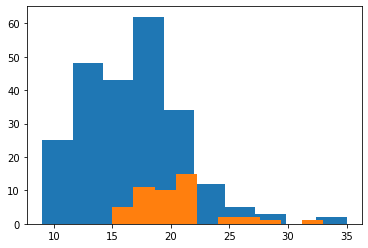

In [14]:
# Plot the distributions
plt.hist(df.cty)
plt.hist(df[df['class'] == 'compact'].cty)

In [15]:
# Establish hypothesis: H_0 = No, H_a = Yes
# Set alpha: alpha = .05
# Verify assumptions: Normal-ish distribution
df[df['class'] == 'compact'].cty.var(), df.cty.var()

(11.46160962072155, 18.1130736216573)

In [16]:
# Compute t and p
t, p = stats.ttest_1samp(df[df['class'] == 'compact'].cty, df.cty.mean())
t, p

(6.6191042534408915, 3.4017448216394005e-08)

In [17]:
t > 0 and p < 0.05

True

#### We reject the null hypothesis, compact cars have statistically-significant greater fuel efficiency than average fuel efficiency of all cars.

### Do manual cars get better gas mileage than automatic cars?

<AxesSubplot:>

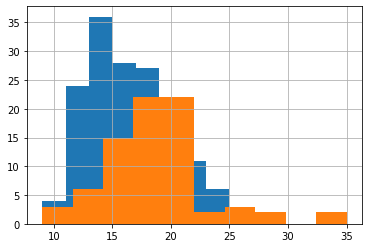

In [18]:
# Plot the distributions
df[df.trans.str.startswith('auto')].cty.hist()
df[df.trans.str.startswith('manual')].cty.hist()

In [19]:
# Null: H_0 = No, H_a = Yes
# alpha = .05
# Verify: Independent variables, normal distribution, equal variance...
df[df.trans.str.startswith('auto')].cty.var(), df[df.trans.str.startswith('manual')].cty.var()

(14.81308182263596, 20.14319890635681)

In [20]:
# Calculate t and p
t, p = stats.ttest_ind(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)
t, p

(4.781718413818975, 3.088973514167085e-06)

In [21]:
# Decide
t > 0 and p < .05

True

#### We reject the null hypothesis, manual cars get statistically-significant better gas mileage than automatic cars.

In [22]:
# Safe test
stats.mannwhitneyu(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)

MannwhitneyuResult(statistic=3814.5, pvalue=2.1320221166439075e-06)

# Correlations

Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Total charges? 
- What happens if you control for phone and internet service?

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Use the sleepstudy data. 
- Is there a relationship between days and reaction time?

## telco_churn data

In [23]:
df = pd.read_csv('Cust_Churn_Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Does tenure correlate with monthly charges?

In [24]:
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [25]:
p < .05

True

### Total charges?

In [26]:
corr, p = stats.pearsonr(df[df.TotalCharges > 0].tenure, df[df.TotalCharges > 0].TotalCharges)
corr, p

(0.8258804609332093, 0.0)

In [27]:
p < .05

True

### What happens if you control for phone and internet service?

#### With phone service

In [28]:
corr, p = stats.pearsonr(df[df.PhoneService == 'Yes'].tenure, df[df.PhoneService == 'Yes'].MonthlyCharges)
corr, p

(0.2453889858536324, 7.117871077925186e-88)

In [29]:
p < .05

True

#### Without phone service

In [30]:
corr, p = stats.pearsonr(df[df.PhoneService == 'No'].tenure, df[df.PhoneService == 'No'].MonthlyCharges)
p < .05

True

#### DSL

In [31]:
corr, p = stats.pearsonr(df[df.InternetService == 'DSL'].tenure, df[df.InternetService == 'DSL'].MonthlyCharges)
p < .05

True

#### Fiber Optic

In [32]:
corr, p = stats.pearsonr(df[df.InternetService == 'Fiber optic'].tenure, df[df.InternetService == 'Fiber optic'].MonthlyCharges)
p < .05

True

#### Without internet service

In [33]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [34]:
corr, p = stats.pearsonr(df[df.InternetService == 'No'].tenure, df[df.InternetService == 'No'].MonthlyCharges)
p < .05

True

## employees database

### Is there a relationship between how long an employee has been with the company and their salary?

In [35]:
from env import host, username, password
def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

url = get_db_url(username, host, password, 'employees')

In [36]:
# Pull salaries table with only historical data
# Historical data keeps the tenure 'normal' because observation stopped many years ago
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date < curdate()', url)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [37]:
# Quick conversion to datetime format for later calculation
salaries['to_date'] = salaries.to_date.astype('datetime64')
salaries['from_date'] = salaries.from_date.astype('datetime64')
salaries.head(20)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [38]:
# Grab earliest and latest date for each employee as well as their highest salary
df1 = pd.DataFrame(salaries.groupby('emp_no').to_date.max()).reset_index()
df2 = pd.DataFrame(salaries.groupby('emp_no').from_date.min()).reset_index()
df3 = pd.DataFrame(salaries.groupby('emp_no').salary.max()).reset_index()
df1, df2, df3

(        emp_no    to_date
 0        10001 2002-06-22
 1        10002 2001-08-02
 2        10003 2001-12-01
 3        10004 2001-11-27
 4        10005 2001-09-09
 ...        ...        ...
 300019  499995 2002-06-01
 300020  499996 2002-05-12
 300021  499997 2001-08-26
 300022  499998 2001-12-25
 300023  499999 2001-11-29
 
 [300024 rows x 2 columns],
         emp_no  from_date
 0        10001 1986-06-26
 1        10002 1996-08-03
 2        10003 1995-12-03
 3        10004 1986-12-01
 4        10005 1989-09-12
 ...        ...        ...
 300019  499995 1997-06-02
 300020  499996 1996-05-13
 300021  499997 1987-08-30
 300022  499998 1993-12-27
 300023  499999 1997-11-30
 
 [300024 rows x 2 columns],
         emp_no  salary
 0        10001   85112
 1        10002   71963
 2        10003   43699
 3        10004   70698
 4        10005   91453
 ...        ...     ...
 300019  499995   49510
 300020  499996   65900
 300021  499997   82750
 300022  499998   51182
 300023  499999   74327
 
 [

In [39]:
# New dataframe with unique employee numbers
df = pd.DataFrame(salaries['emp_no'].unique())
df.columns = ['emp_no']
df

,emp_no
0,10001
1,10002
2,10003
3,10004
4,10005
...,...
300019,499995
300020,499996
300021,499997
300022,499998


In [40]:
# Add tenure to dataframe
df['tenure'] = df1['to_date'].sub(df2['from_date']).dt.days
df

,emp_no,tenure
0,10001,5840
1,10002,1825
2,10003,2190
3,10004,5475
4,10005,4380
...,...,...
300019,499995,1825
300020,499996,2190
300021,499997,5110
300022,499998,2920


In [41]:
# Add max salary to dataframe
df['max_salary'] = df3.salary
df

,emp_no,tenure,max_salary
0,10001,5840,85112
1,10002,1825,71963
2,10003,2190,43699
3,10004,5475,70698
4,10005,4380,91453
...,...,...,...
300019,499995,1825,49510
300020,499996,2190,65900
300021,499997,5110,82750
300022,499998,2920,51182


In [42]:
# Calculate t-statistic and p-value from tenure and max_salary
stats.pearsonr(df.tenure, df.max_salary)

(0.5236371831581195, 0.0)

In [43]:
# Trying to do this where '9999-01-01' is actually today's date instead
# Pull all records
sals = pd.read_sql('SELECT * FROM salaries', url)
sals.head(20)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [44]:
# Convert future times to today's date
sals.loc[sals['to_date'] > pd.to_datetime('today'), 'to_date'] = pd.Timestamp('today').strftime("%Y-%m-%d")
sals.head(20)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [45]:
# Convert dates to datetime format for tenure calculation
sals['to_date'] = sals.to_date.astype('datetime64')
sals['from_date'] = sals.from_date.astype('datetime64')
sals.head(20)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [46]:
# Create new dataframes for combination
df1a = pd.DataFrame(sals.groupby('emp_no').to_date.max()).reset_index()
df2a = pd.DataFrame(sals.groupby('emp_no').from_date.min()).reset_index()
df3a = pd.DataFrame(sals.groupby('emp_no').salary.max()).reset_index()
df1a, df2a, df3a

(        emp_no    to_date
 0        10001 2021-08-10
 1        10002 2021-08-10
 2        10003 2021-08-10
 3        10004 2021-08-10
 4        10005 2021-08-10
 ...        ...        ...
 300019  499995 2021-08-10
 300020  499996 2021-08-10
 300021  499997 2021-08-10
 300022  499998 2021-08-10
 300023  499999 2021-08-10
 
 [300024 rows x 2 columns],
         emp_no  from_date
 0        10001 1986-06-26
 1        10002 1996-08-03
 2        10003 1995-12-03
 3        10004 1986-12-01
 4        10005 1989-09-12
 ...        ...        ...
 300019  499995 1997-06-02
 300020  499996 1996-05-13
 300021  499997 1987-08-30
 300022  499998 1993-12-27
 300023  499999 1997-11-30
 
 [300024 rows x 2 columns],
         emp_no  salary
 0        10001   88958
 1        10002   72527
 2        10003   43699
 3        10004   74057
 4        10005   94692
 ...        ...     ...
 300019  499995   52868
 300020  499996   69501
 300021  499997   83441
 300022  499998   55003
 300023  499999   77303
 
 [

In [47]:
# Create final dataframe
dfa = pd.DataFrame(sals['emp_no'].unique())
dfa.columns = ['emp_no']
dfa

,emp_no
0,10001
1,10002
2,10003
3,10004
4,10005
...,...
300019,499995
300020,499996
300021,499997
300022,499998


In [48]:
# Add tenure to final dataframe
dfa['tenure'] = df1a['to_date'].sub(df2a['from_date']).dt.days
dfa

,emp_no,tenure
0,10001,12829
1,10002,9138
2,10003,9382
3,10004,12671
4,10005,11655
...,...,...
300019,499995,8835
300020,499996,9220
300021,499997,12399
300022,499998,10088


In [49]:
# Add max salary to final dataframe
dfa['max_salary'] = df3a.salary
dfa

,emp_no,tenure,max_salary
0,10001,12829,88958
1,10002,9138,72527
2,10003,9382,43699
3,10004,12671,74057
4,10005,11655,94692
...,...,...,...
300019,499995,8835,52868
300020,499996,9220,69501
300021,499997,12399,83441
300022,499998,10088,55003


In [50]:
# Calculate t-statistic and p-value for tenure and max salary
stats.pearsonr(dfa.tenure, dfa.max_salary)

(0.40871386567304946, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [51]:
titles = pd.read_sql('SELECT emp_no, title FROM titles', url)
titles.head(20)

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer
5,10005,Senior Staff
6,10005,Staff
7,10006,Senior Engineer
8,10007,Senior Staff
9,10007,Staff


In [52]:
agg_titles = titles.groupby('emp_no').title.count().reset_index()
agg_titles.head(5)

,emp_no,title
0,10001,1
1,10002,1
2,10003,1
3,10004,2
4,10005,2


In [53]:
df = df.merge(agg_titles, on='emp_no')
df.head(20)

,emp_no,tenure,max_salary,title
0,10001,5840,85112,1
1,10002,1825,71963,1
2,10003,2190,43699,1
3,10004,5475,70698,2
4,10005,4380,91453,2
5,10006,4015,60098,1
6,10007,4745,84456,2
7,10008,873,52668,1
8,10009,6205,94443,3
9,10010,1825,79580,1


In [54]:
stats.pearsonr(df.tenure, df.title)

(0.5929107912235184, 0.0)

## sleepstudy data

### Is there a relationship between days and reaction time?

In [55]:
sleepy = data('sleepstudy')
sleepy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [56]:
stats.pearsonr(sleepy.Days, sleepy.Reaction)

(0.5352302262650253, 9.894096322214812e-15)